#1. Import Pycaret

In [1]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [2]:
from pycaret.utils import version
version()

'3.3.2'

#2. Import Library

In [3]:
import pandas as pd
from pycaret.classification import *

#3. Import Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#path_bugzilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/bugzilla.csv'
#path_columba = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/columba.csv'
path_jdt = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/jdt.csv'
#path_mozilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/mozilla.csv'
#path_platform = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/platform.csv'
#path_postgres = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/postgres.csv'

#df = pd.read_csv(path_bugzilla)
#df = pd.read_csv(path_columba)
df = pd.read_csv(path_jdt)
#df = pd.read_csv(path_mozilla)
#df = pd.read_csv(path_platform)
#df = pd.read_csv(path_postgres)

#4. Preprocessing

In [6]:
df.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,7,2003/10/10 16:10,1,1,3,0.581676,0.065669,0.021729,690.333333,1,6,36,0.666667,3709,1752.666667,3709,1
1,13,2002/5/14 7:42,1,1,1,0.000000,0.002985,0.008955,670.000000,0,3,0,1.000000,13391,7983.500000,13391,0
2,14,2002/5/13 15:48,1,2,2,0.000000,0.000000,0.000000,34.500000,0,1,7,1.000000,1508,1508.000000,1508,1
3,16,2002/4/5 8:48,1,1,3,0.000000,0.000000,0.000000,0.000000,0,1,458,0.666667,12804,8025.500000,12804,0
4,28,2001/8/24 15:14,1,37,429,0.622239,0.217704,0.266461,170.533799,0,1,835,0.018648,6003,6003.000000,6003,0


In [7]:
# Menghapus kolom yang tidak dibutuhkan
df_stats = df.drop(columns=['transactionid', 'commitdate'])

# Menghitung statistik deskriptif
df_stats.describe()




,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
count,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000
mean,1.011106,1.616317,3.873622,0.269430,0.090091,0.101184,437.715968,0.305177,5.155627,241.738456,0.902288,4040.821568,1836.063950,3731.867405,0.143814
std,0.112348,2.266850,22.640998,0.383239,0.333288,2.506563,658.915628,0.460489,3.669904,2866.740155,0.209573,4755.551380,1830.484467,4798.822011,0.350906
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.002299,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.005151,0.002323,105.000000,0.000000,2.000000,1.000000,1.000000,856.000000,619.537500,644.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.021734,0.011052,238.104167,0.000000,4.000000,13.000000,1.000000,2298.000000,1439.484470,1873.000000,0.000000
75%,1.000000,1.000000,2.000000,0.669799,0.074326,0.041667,496.000000,1.000000,7.000000,80.000000,1.000000,5053.000000,2360.157510,4594.000000,0.000000
max,4.000000,87.000000,1645.000000,1.000000,25.000000,263.333333,7140.000000,1.000000,25.000000,212376.000000,1.000000,22512.000000,11336.500000,22512.000000,1.000000


In [8]:
df['ns'].unique()

array([1, 2, 3, 4])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


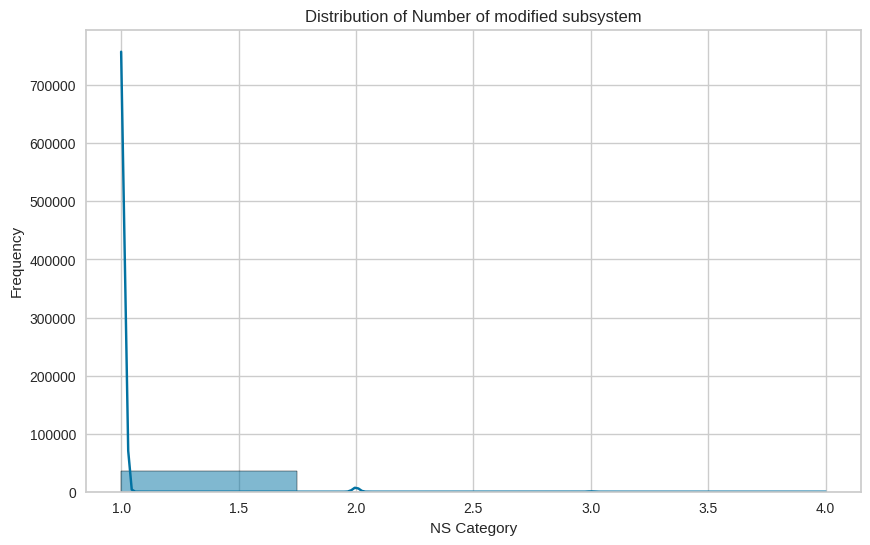

In [10]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ns'], kde=True, color="b", bins=4)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified subsystem')
plt.xlabel('NS Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [11]:
df['nm'].unique()

array([ 1,  2, 37,  9,  3,  5,  6, 21,  4,  7, 15,  8, 11, 10, 12, 16, 24,
       14, 13, 29, 19, 35, 36, 27, 45, 17, 18, 40, 23, 48, 39, 41, 28, 26,
       33, 20, 30, 82, 55, 62, 87, 32, 86, 76, 54, 83])

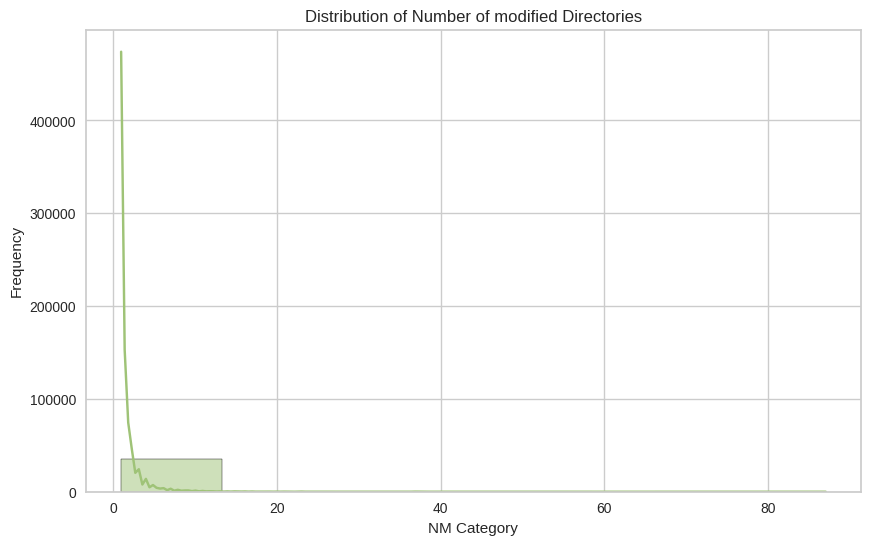

In [12]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nm'], kde=True, color="g", bins=7)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Directories')
plt.xlabel('NM Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [13]:
df['nf'].unique()

array([   3,    1,    2,  429,   42,    7,    4,    5,   10,    6,  709,
        363,   12,   16,   20,   13,    8,   35,    9,   14,   19,   23,
         15,   21,   17,   56,   11,   69,  129,   54,   18,  430,   33,
         40,   22,   25,   24,   39,   26,   32,   52,   51,  203,  435,
         36,   44,   48,   28,   75,   37,   34,   49,   29,   53,   68,
        746,  424,  404,  269,  144,  120,   80,  105,   90,  829,  251,
         47,  184,   63,   30,   67,  835,  245,  194,  108,  124,   43,
         59,   38,   27,  130,   86,   55,   46, 1013,  253,   31,  150,
        102,   93,  103,   62,   45,   83,   60,  152,   89,  107,  137,
         84,  106,   65,  111,  116,   73,   76,  753,  112,   79,  483,
         72,  193,   57,  254,   71,   50,   94,  142,  118,  114,  162,
        128,  168,  383,   70,  268,  121,   95,  179,   92,   64,  164,
        136,  213,  153,  384,  316,   58,  155,  392,  104,  409,  436,
         85,  147,   41,  149,  328,  113,  243,  9

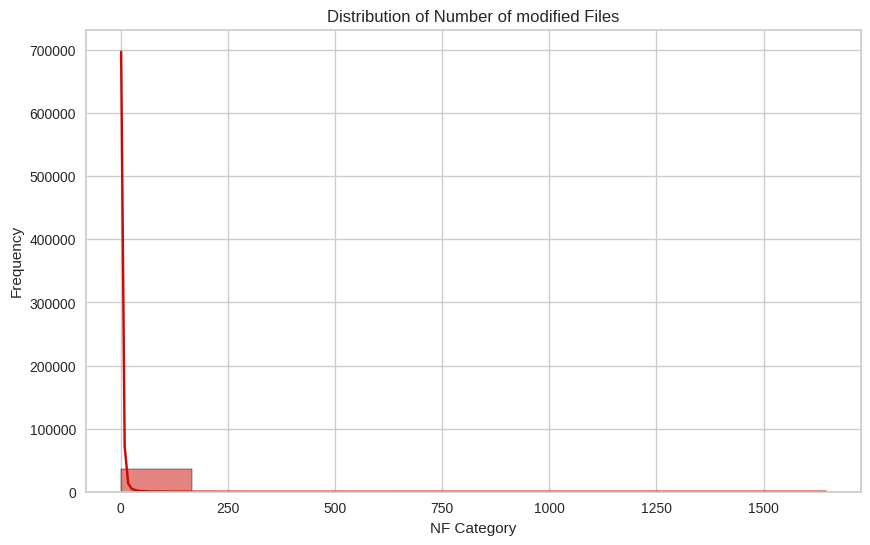

In [14]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nf'], kde=True, color="r", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Files')
plt.xlabel('NF Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [15]:
df['entropy'].unique()

array([0.5816763 , 0.        , 0.62223934, ..., 0.87398284, 0.6517617 ,
       0.89991511])

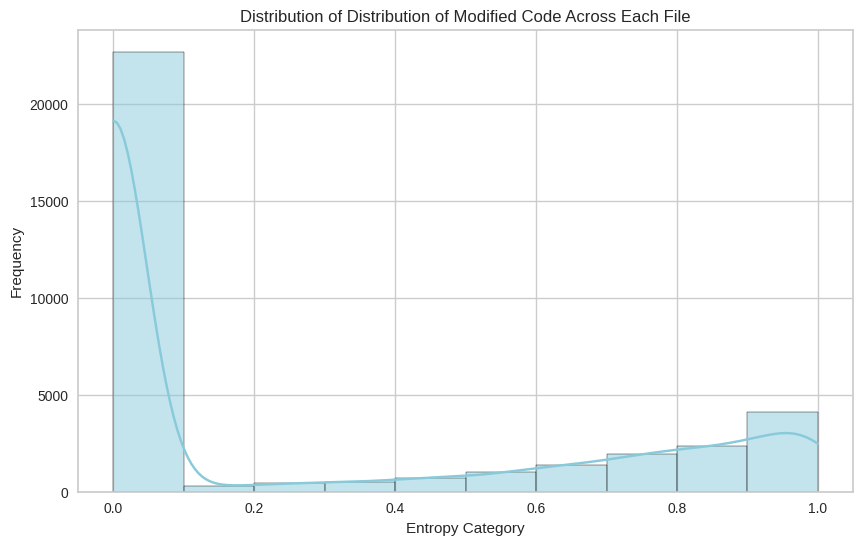

In [16]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['entropy'], kde=True, color="c", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Distribution of Modified Code Across Each File')
plt.xlabel('Entropy Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [17]:
df['la'].unique()

array([0.06566876, 0.00298507, 0.        , ..., 0.1954023 , 0.34142857,
       0.09809391])

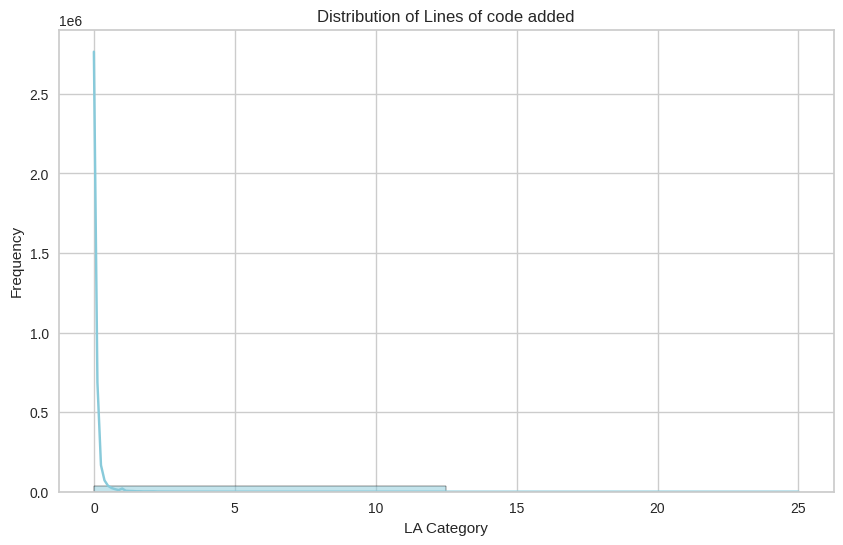

In [18]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['la'], kde=True, color="c", bins=2)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code added')
plt.xlabel('LA Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [19]:
df['ld'].unique()

array([0.02172863, 0.00895522, 0.        , ..., 0.17901235, 0.17285714,
       0.08441962])

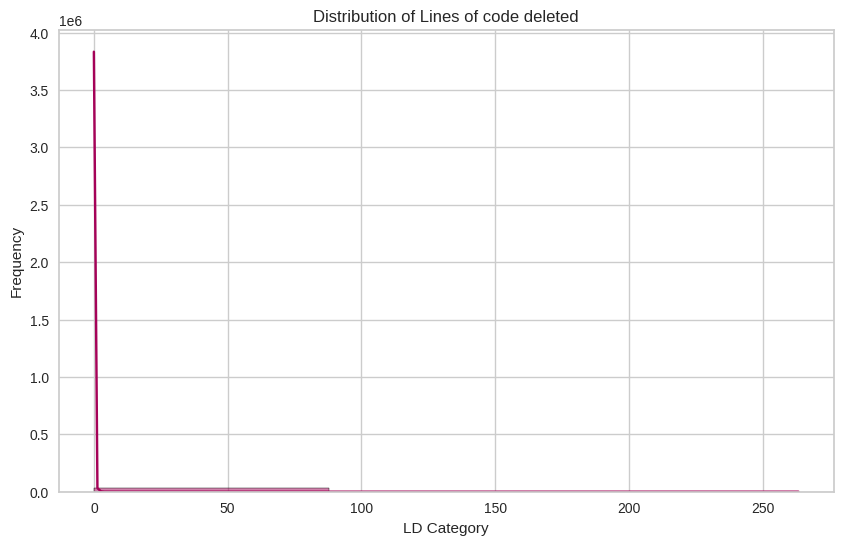

In [20]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ld'], kde=True, color="m", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code deleted')
plt.xlabel('LD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [21]:
df['lt'].unique()

array([690.3333333 , 670.        ,  34.5       , ..., 143.0588235 ,
        95.82352941, 143.4       ])

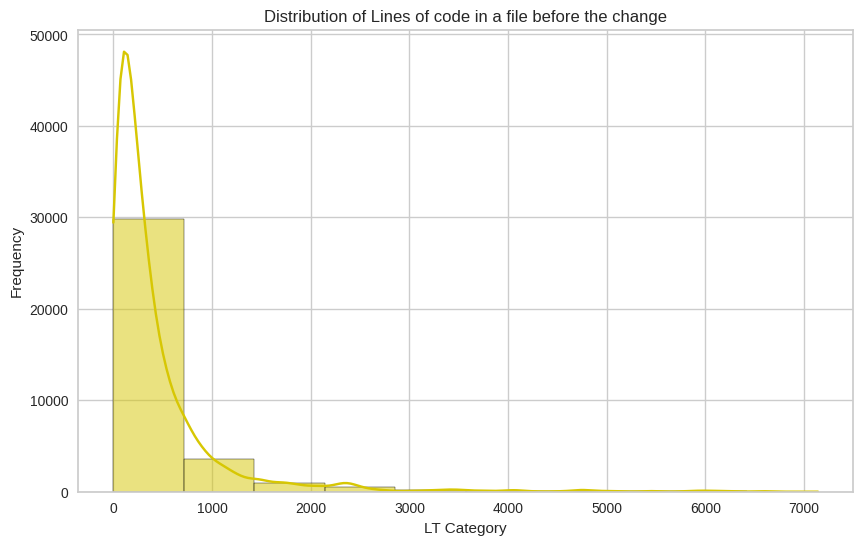

In [22]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['lt'], kde=True, color="y", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code in a file before the change')
plt.xlabel('LT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [23]:
df['fix'].unique()

array([1, 0])

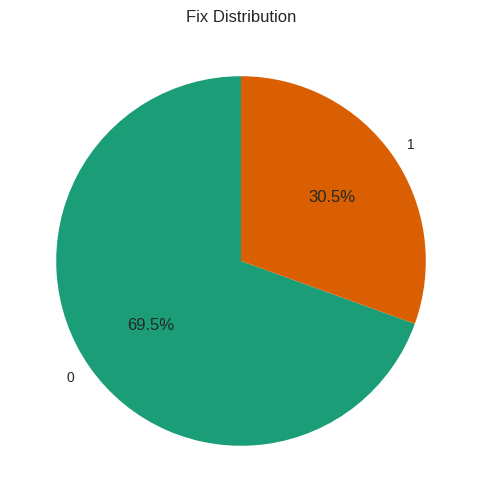

In [24]:
a=df['fix'].value_counts()

# Membuat pie diagram
plt.figure(figsize=(8, 6))
plt.pie(a, labels=a.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'), startangle=90)

# Menambahkan judul
plt.title('Fix Distribution')

# Menampilkan plot
plt.show()

In [25]:
df['ndev'].unique()

array([ 6,  3,  1, 10,  5,  2,  8, 11, 12,  7,  9, 15, 13,  4, 14, 18, 16,
       23, 19, 22, 21, 17, 20, 25])

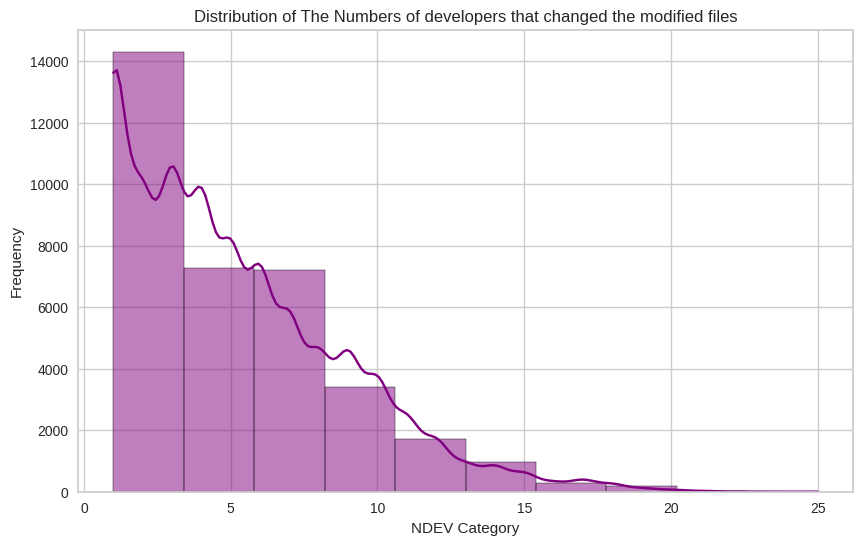

In [26]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ndev'], kde=True, color="purple", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of The Numbers of developers that changed the modified files')
plt.xlabel('NDEV Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [27]:
df['pd'].unique()

array([  36,    0,    7, ..., 8322, 2021, 1115])

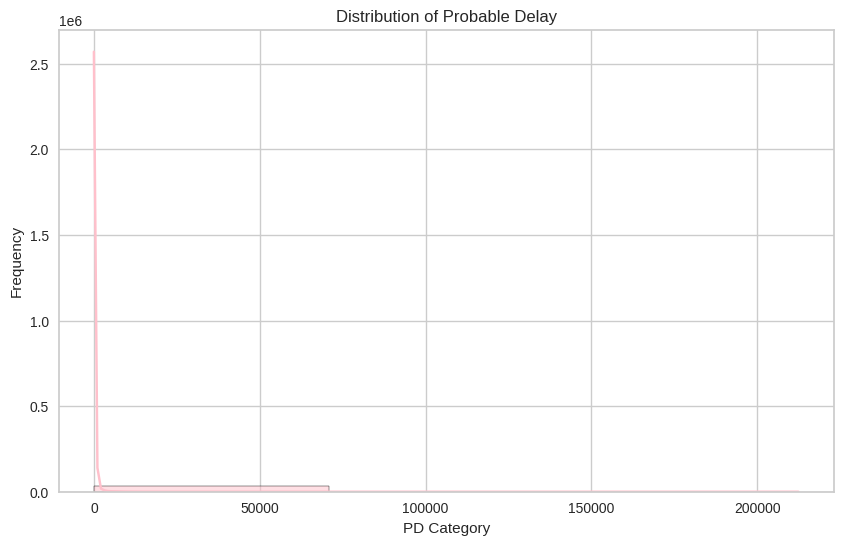

In [28]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="pink", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Probable Delay')
plt.xlabel('PD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [29]:
df['npt'].unique()

array([0.66666667, 1.        , 0.01864802, 0.11904762, 0.85714286,
       0.5       , 0.8       , 0.00282087, 0.00275482, 0.33333333,
       0.75      , 0.83333333, 0.6       , 0.84615385, 0.625     ,
       0.53846154, 0.25      , 0.71428571, 0.57142857, 0.16666667,
       0.69230769, 0.63157895, 0.88888889, 0.28571429, 0.77777778,
       0.64285714, 0.23076923, 0.42857143, 0.56521739, 0.3       ,
       0.52380952, 0.52941176, 0.91666667, 0.78571429, 0.69642857,
       0.63636364, 0.34782609, 0.53488372, 0.59259259, 0.72222222,
       0.94117647, 0.2       , 0.58823529, 0.125     , 0.875     ,
       0.00232558, 0.48484848, 0.475     , 0.81818182, 0.92307692,
       0.89473684, 0.8125    , 0.45454545, 0.9       , 0.55555556,
       0.4       , 0.44444444, 0.64      , 0.79166667, 0.8974359 ,
       0.58333333, 0.69565217, 0.54166667, 0.21428571, 0.46153846,
       0.31372549, 0.01970443, 0.00229885, 0.04186046, 0.54545455,
       0.61538461, 0.31818182, 0.08333333, 0.57894737, 0.72727

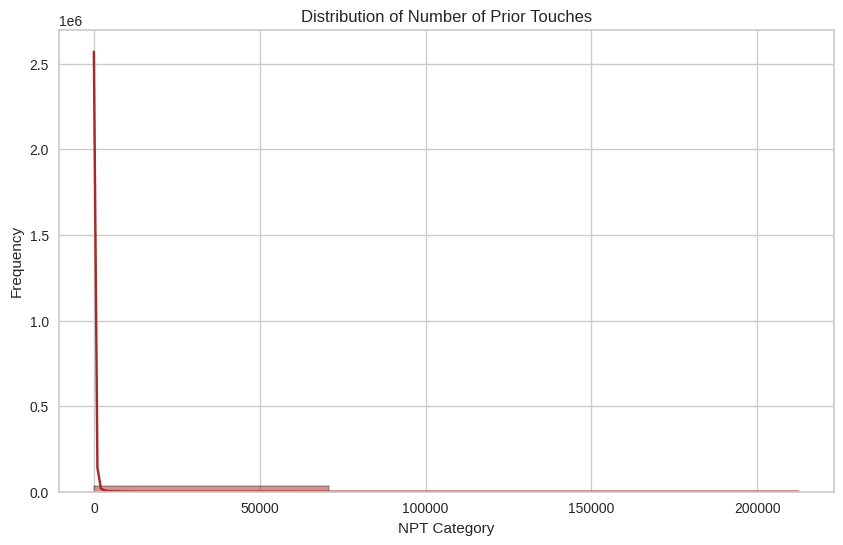

In [30]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="brown", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of Prior Touches')
plt.xlabel('NPT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

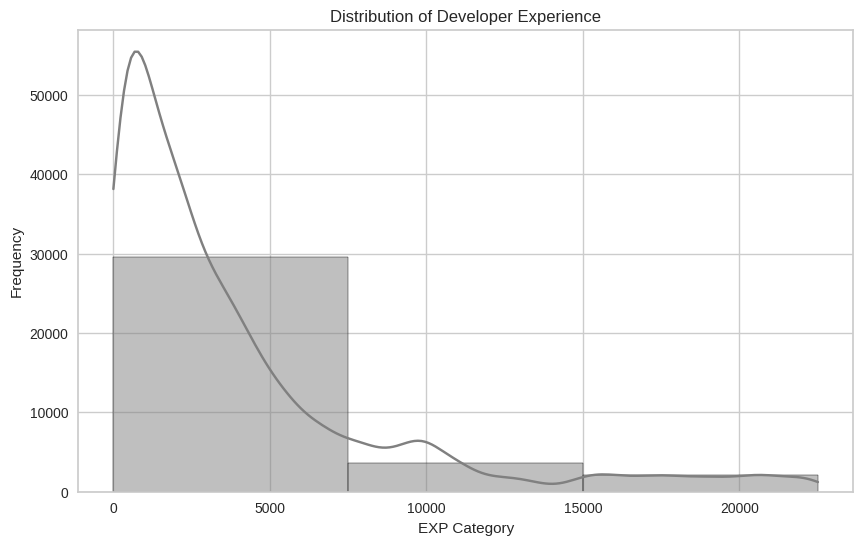

In [31]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['exp'], kde=True, color="gray", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience')
plt.xlabel('EXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

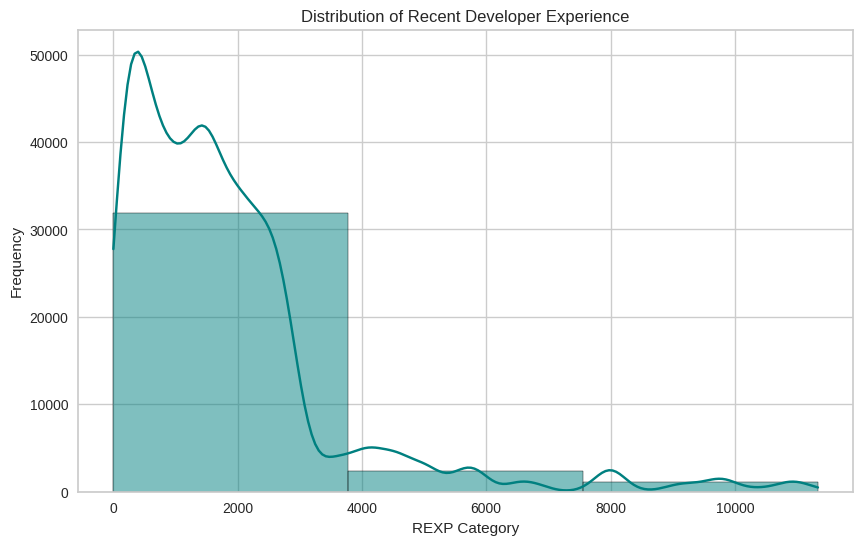

In [32]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['rexp'], kde=True, color="teal", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Recent Developer Experience')
plt.xlabel('REXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

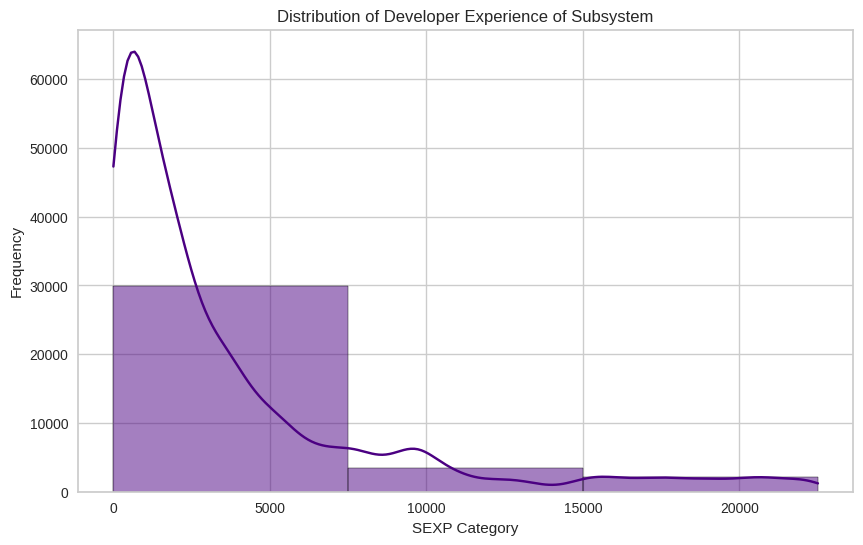

In [33]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['sexp'], kde=True, color="indigo", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience of Subsystem')
plt.xlabel('SEXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

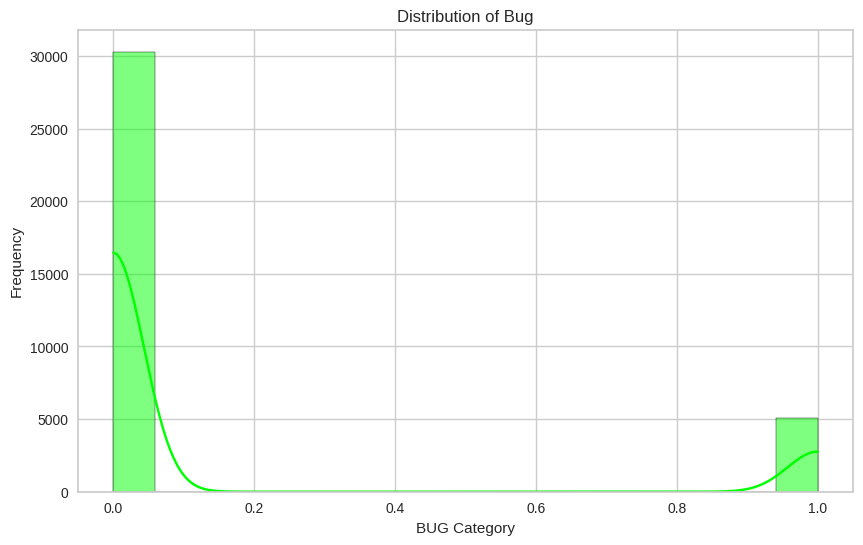

In [34]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['bug'], kde=True, color="lime")

# Menambahkan judul dan label sumbu
plt.title('Distribution of Bug')
plt.xlabel('BUG Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35386 entries, 0 to 35385
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  35386 non-null  int64  
 1   commitdate     35386 non-null  object 
 2   ns             35386 non-null  int64  
 3   nm             35386 non-null  int64  
 4   nf             35386 non-null  int64  
 5   entropy        35386 non-null  float64
 6   la             35386 non-null  float64
 7   ld             35386 non-null  float64
 8   lt             35386 non-null  float64
 9   fix            35386 non-null  int64  
 10  ndev           35386 non-null  int64  
 11  pd             35386 non-null  int64  
 12  npt            35386 non-null  float64
 13  exp            35386 non-null  int64  
 14  rexp           35386 non-null  float64
 15  sexp           35386 non-null  int64  
 16  bug            35386 non-null  int64  
dtypes: float64(6), int64(10), object(1)
memory usage: 

In [36]:
df.isna().sum()

,0
transactionid,0
commitdate,0
ns,0
nm,0
nf,0
entropy,0
la,0
ld,0
lt,0
fix,0


In [37]:
df.drop(['transactionid', 'commitdate'], axis=1, inplace=True)
df.head()

,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,1,1,3,0.581676,0.065669,0.021729,690.333333,1,6,36,0.666667,3709,1752.666667,3709,1
1,1,1,1,0.000000,0.002985,0.008955,670.000000,0,3,0,1.000000,13391,7983.500000,13391,0
2,1,2,2,0.000000,0.000000,0.000000,34.500000,0,1,7,1.000000,1508,1508.000000,1508,1
3,1,1,3,0.000000,0.000000,0.000000,0.000000,0,1,458,0.666667,12804,8025.500000,12804,0
4,1,37,429,0.622239,0.217704,0.266461,170.533799,0,1,835,0.018648,6003,6003.000000,6003,0


In [38]:
df['bug'].value_counts()

,count
bug,
0,30297
1,5089


#4. Training

In [39]:
clf = setup(
    data=df,
    target='bug',
    session_id=101,
    fix_imbalance=True,
    fix_imbalance_method='smote',
    fold=10,
    verbose=True
)

,Description,Value
0,Session id,101
1,Target,bug
2,Target type,Binary
3,Original data shape,"(35386, 15)"
4,Transformed data shape,"(53032, 15)"
5,Transformed train set shape,"(42416, 15)"
6,Transformed test set shape,"(10616, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [40]:
# 6. Bandingkan semua model dan ambil model terbaik
best_model = compare_models(sort='Accuracy', exclude=['dummy'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:49:59
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7805,0.5981,0.3419,0.2824,0.3093,0.1802,0.1814,0.8010
knn,K Neighbors Classifier,0.6671,0.6170,0.4770,0.2103,0.2918,0.1152,0.1318,0.8850
ridge,Ridge Classifier,0.6598,0.7013,0.6350,0.2409,0.3493,0.1779,0.2163,0.1350
lr,Logistic Regression,0.6434,0.7103,0.6527,0.2345,0.3449,0.1691,0.2110,5.0280
svm,SVM - Linear Kernel,0.4049,0.5808,0.7424,0.1734,0.2551,0.0466,0.0784,0.5640
nb,Naive Bayes,0.2185,0.6559,0.9399,0.1489,0.2570,0.0116,0.0455,0.1800


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8587,0.7917,0.2636,0.5167,0.3488,0.2789,0.2989,2.3520
xgboost,Extreme Gradient Boosting,0.8558,0.7824,0.2827,0.4961,0.3600,0.2857,0.3001,0.7570
rf,Random Forest Classifier,0.8473,0.7671,0.3052,0.4536,0.3645,0.2816,0.2889,9.6410
gbc,Gradient Boosting Classifier,0.8383,0.7626,0.3476,0.4245,0.3820,0.2901,0.2921,13.5560
et,Extra Trees Classifier,0.8371,0.7581,0.3338,0.4174,0.3706,0.2784,0.2809,4.3590
ada,Ada Boost Classifier,0.7991,0.7403,0.4396,0.3449,0.3863,0.2684,0.2713,2.9090
dt,Decision Tree Classifier,0.7805,0.5981,0.3419,0.2824,0.3093,0.1802,0.1814,0.8010
knn,K Neighbors Classifier,0.6671,0.6170,0.4770,0.2103,0.2918,0.1152,0.1318,0.8850
lda,Linear Discriminant Analysis,0.6599,0.7013,0.6350,0.2410,0.3493,0.1779,0.2163,0.2090
ridge,Ridge Classifier,0.6598,0.7013,0.6350,0.2409,0.3493,0.1779,0.2163,0.1350


In [47]:
rf= create_model('rf')
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8522,0.7866,0.3483,0.4806,0.4039,0.3220,0.3275
1,0.8405,0.7629,0.2725,0.4163,0.3294,0.2433,0.2504
2,0.8466,0.7528,0.2949,0.4487,0.3559,0.2731,0.2808
3,0.8486,0.7761,0.2725,0.4554,0.3409,0.2615,0.2725
4,0.8498,0.7590,0.3034,0.4655,0.3673,0.2864,0.2949
5,0.8462,0.7671,0.3483,0.4542,0.3943,0.3079,0.3115
6,0.8381,0.7496,0.2612,0.4026,0.3169,0.2297,0.2367
7,0.8530,0.7632,0.3202,0.4831,0.3851,0.3056,0.3139
8,0.8514,0.7682,0.3221,0.4772,0.3846,0.3037,0.3113


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8563,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8563,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8563,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8563,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8563,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8563,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8563,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8563,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8559,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [41]:
gbc= create_model('gbc')
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8494,0.7765,0.3736,0.4700,0.4163,0.3311,0.3340
1,0.8389,0.7581,0.3511,0.4266,0.3852,0.2935,0.2954
2,0.8325,0.7514,0.3343,0.4007,0.3645,0.2689,0.2704
3,0.8458,0.7737,0.3680,0.4549,0.4068,0.3193,0.3217
4,0.8365,0.7513,0.3343,0.4146,0.3701,0.2774,0.2796
5,0.8264,0.7583,0.3483,0.3851,0.3658,0.2655,0.2660
6,0.8292,0.7356,0.2921,0.3782,0.3296,0.2336,0.2362
7,0.8417,0.7691,0.3708,0.4400,0.4024,0.3120,0.3135
8,0.8434,0.7835,0.3557,0.4456,0.3956,0.3070,0.3095


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8575,0.7930,0.3287,0.5065,0.3986,0.3219,0.3316
1,0.8567,0.7903,0.2781,0.5025,0.3580,0.2848,0.3007
2,0.8506,0.7695,0.2837,0.4676,0.3531,0.2744,0.2854
3,0.8543,0.7871,0.2865,0.4880,0.3611,0.2850,0.2979
4,0.8526,0.7807,0.2893,0.4791,0.3608,0.2832,0.2947
5,0.8502,0.7748,0.2921,0.4664,0.3592,0.2795,0.2893
6,0.8466,0.7755,0.2556,0.4417,0.3238,0.2442,0.2559
7,0.8575,0.7920,0.3146,0.5068,0.3882,0.3125,0.3239
8,0.8518,0.7834,0.2745,0.4757,0.3481,0.2713,0.2844


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
lightgbm= create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8595,0.7993,0.2753,0.5213,0.3603,0.2897,0.3084
1,0.8607,0.7879,0.2697,0.5304,0.3575,0.2886,0.3095
2,0.8575,0.7841,0.2500,0.5086,0.3352,0.2656,0.2868
3,0.8619,0.7961,0.2444,0.5438,0.3372,0.2724,0.2997
4,0.8615,0.7818,0.2697,0.5363,0.3589,0.2907,0.3123
5,0.8547,0.7874,0.2781,0.4901,0.3548,0.2799,0.2942
6,0.8506,0.7742,0.2135,0.4578,0.2912,0.2199,0.2400
7,0.8583,0.8058,0.2669,0.5135,0.3512,0.2805,0.2995
8,0.8595,0.8017,0.2773,0.5238,0.3626,0.2920,0.3107


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
voting_model = blend_models(estimator_list=[lightgbm, tuned_rf, tuned_gbc], method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8603,0.8014,0.3006,0.5245,0.3821,0.3099,0.3252
1,0.8595,0.7930,0.2697,0.5217,0.3556,0.2856,0.3052
2,0.8583,0.7802,0.2612,0.5138,0.3464,0.2762,0.2962
3,0.8591,0.7958,0.2528,0.5202,0.3403,0.2718,0.2941
4,0.8571,0.7858,0.2584,0.5055,0.3420,0.2711,0.2904
5,0.8559,0.7854,0.2865,0.4976,0.3636,0.2889,0.3030
6,0.8486,0.7799,0.2107,0.4438,0.2857,0.2129,0.2315
7,0.8607,0.8037,0.2893,0.5282,0.3739,0.3030,0.3204
8,0.8603,0.7977,0.2885,0.5282,0.3732,0.3021,0.3197


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [49]:
# 7. Finalisasi model terbaik
final_model = finalize_model(voting_model)

In [50]:
# 8. Evaluasi model dengan berbagai plot
evaluate_model(final_model)  # akan menampilkan GUI dengan berbagai evaluasi (ROC, Confusion Matrix, dll)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [51]:
# 9. Simpan model ke Google Drive
model_path = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/Cross Project Defect Prediction/Model/jdt_best_model'
save_model(final_model, model_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ns', 'nm', 'nf', 'entropy', 'la',
                                              'ld', 'lt', 'fix', 'ndev', 'pd',
                                              'npt', 'exp', 'rexp', 'sexp'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer'...
                                                                           max_features=1.0,
   